In [1]:
#4. Use car details CSV file and implement decision tree algorithm 
    #• Find out the accuracy level.
    #• Display the no: of mislabelled classification from test data set
    #• List out the class labels of the mismatching records
    
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection

data = pd.read_csv('car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
data['class'],class_names = pd.factorize(data['class'])

print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [4]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [7]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82


In [8]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 96


In [10]:
#7. Create a neural network for the given ‘houseprice.csv’ to predict the whether price of the house is above 
#or below median value or not.
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [11]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [12]:
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 21ms/step - loss: 0.6817 - accuracy: 0.6331 - val_loss: 0.6803 - val_accuracy: 0.6393
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6605 - val_loss: 0.6761 - val_accuracy: 0.6438
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.6849 - val_loss: 0.6722 - val_accuracy: 0.6393
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6898 - val_loss: 0.6682 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6996 - val_loss: 0.6641 - val_accuracy: 0.6895
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.7055 - val_loss: 0.6599 - val_accuracy: 0.7215
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.7270 - val_loss: 0.6557 - val_accuracy: 0.7306
Epoch 8/100


In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.8813


0.8812785148620605

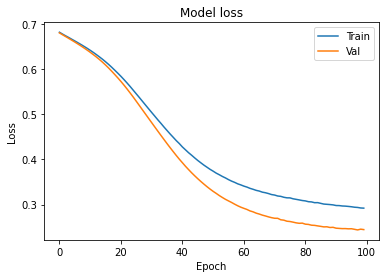

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

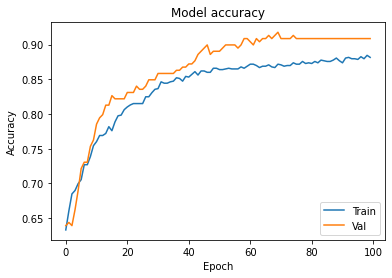

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 51ms/step - loss: 0.5002 - accuracy: 0.7368 - val_loss: 0.3025 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 0.3521 - accuracy: 0.8474 - val_loss: 0.2986 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.3398 - accuracy: 0.8562 - val_loss: 0.2770 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.3010 - accuracy: 0.8718 - val_loss: 0.2691 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.2903 - accuracy: 0.8836 - val_loss: 0.2372 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2982 - accuracy: 0.8601 - val_loss: 0.2368 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.2687 - accuracy: 0.8836 - val_loss: 0.2301 - val_accuracy: 0.9178
Epoch 

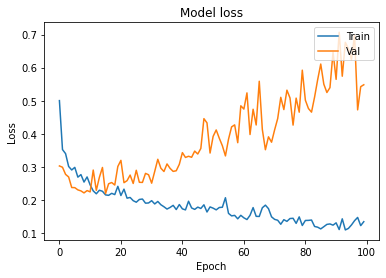

In [20]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

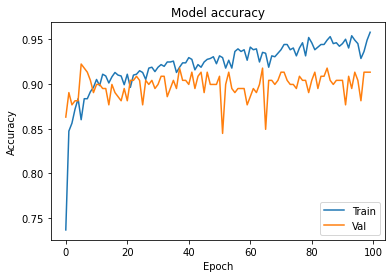

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 78ms/step - loss: 14.2587 - accuracy: 0.6419 - val_loss: 3.8925 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 3s 79ms/step - loss: 1.6936 - accuracy: 0.8219 - val_loss: 0.7479 - val_accuracy: 0.8037
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 0.6363 - accuracy: 0.8258 - val_loss: 0.5133 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 3s 86ms/step - loss: 0.5226 - accuracy: 0.8659 - val_loss: 0.4511 - val_accuracy: 0.9132
Epoch 5/100
32/32 [==============================] - 2s 70ms/step - loss: 0.5025 - accuracy: 0.8650 - val_loss: 0.4344 - val_accuracy: 0.9224
Epoch 6/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5127 - accuracy: 0.8630 - val_loss: 0.4298 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 2s 69ms/step - loss: 0.4728 - accuracy: 0.8806 - val_loss: 0.4616 - val_accuracy: 0.8767
Epoch

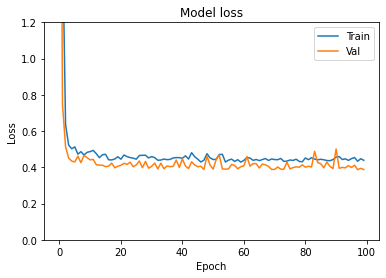

In [25]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

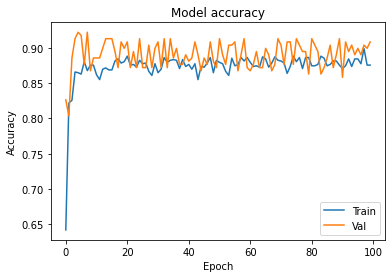

In [26]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()